# Chapter 4: Plotting and visualization

陶欣雨 22019207061

In [1]:
%matplotlib inline
#调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt #为创建图形示例提供一些方法

In [3]:
import numpy as np  #数组运算的数学函数库

## Gettings started

In [4]:
x = np.linspace(-5, 2, 100)   # linspace（x, y, n）产生x和y之间等间隔的n个数，如果n = 1，返回结果为y

In [5]:
y1 = x**3 + 5*x**2 + 10   # **乘方

In [6]:
y2 = 3*x**2 + 10*x

In [7]:
y3 = 6*x + 10

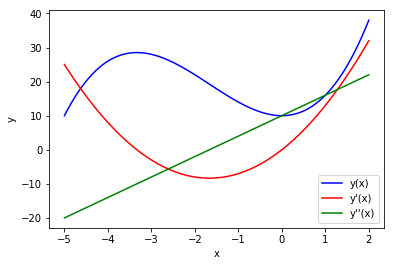

In [8]:
fig, ax = plt.subplots() # generate Figure and Axes instances

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [9]:
fig.savefig("ch4-figure-1.pdf")

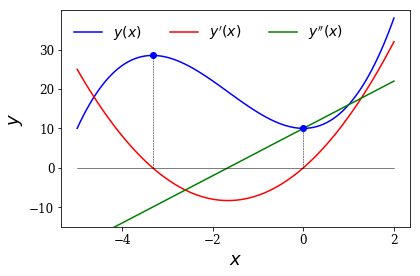

In [10]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"
#pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。
#通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。

fig, ax = plt.subplots()

ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")   #lw:折线图的线条宽度; ls折线图的线条风格
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")  #zeros_like(x)其维度与矩阵X一致，并为其初始化为全0
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")  #图中虚线
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue")  #图中蓝点

ax.set_ylim(-15, 40) #限制y轴的长度 -15到40
ax.set_yticks([-10, 0, 10, 20, 30])  #y轴刻度
ax.set_xticks([-4, -2, 0, 2])  #x轴刻度

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)   #loc：位置参数；ncol:设置图例分为n列展示;frameon=false去掉图例边框

fig.tight_layout(); #会自动调整子图参数，使之填充整个图像区域

In [11]:
fig.savefig("ch4-figure-2.pdf")

In [12]:
#设置字体和大小
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"

## Figure

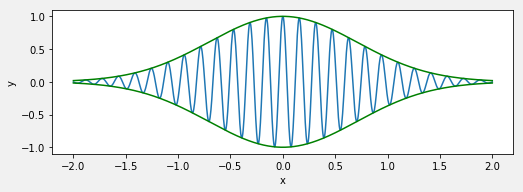

In [14]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")   #使用函数创建Figure对象
#num:图像编号或名称，数字为编号 ，字符串为名称
#figsize:指定figure的宽和高，单位为英寸；
#dpi参数指定绘图对象的分辨率
#facecolor:背景颜色
#edgecolor:边框颜色
#frameon:是否显示边框

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height))#, axisbg="#e1e1e1")   #axisbg背景色
#add_axes为新增子区域，该区域可以座落在figure内任意位置，且该区域可任意设置大小

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2) #以e为底的指数函数

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")
fig.savefig("graph.pdf", dpi=300, facecolor="#f1f1f1")

## Plot types

In [15]:
fignum = 0

#隐藏label
def hide_labels(fig, ax):
    global fignum
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight')
    
    fignum += 1
    fig.savefig("plot-types-%d.pdf" % fignum)
    

In [16]:
x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

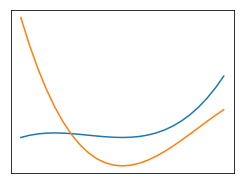

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x, y1)
ax.plot(x, y2)

hide_labels(fig, ax)

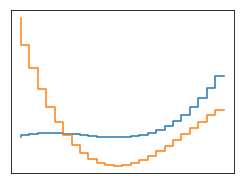

In [18]:
fig, ax = plt.subplots(figsize=(4, 3))
#阶梯图
ax.step(x, y1)
ax.step(x, y2)

hide_labels(fig, ax)

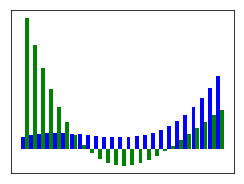

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))
width = 6/50.0
#柱状图
ax.bar(x - width/2, y1, width=width, color="blue")
ax.bar(x + width/2, y2, width=width, color="green")

hide_labels(fig, ax)

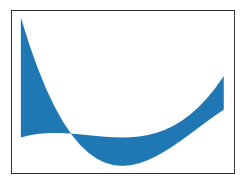

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))
#填充两个函数之间的区域
ax.fill_between(x, y1, y2)

hide_labels(fig, ax)

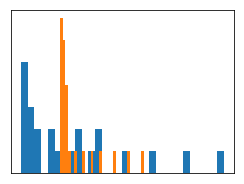

In [21]:
fig, ax = plt.subplots(figsize=(4, 3))
#直方图
ax.hist(y2, bins=30) #bins 箱子的个数
ax.hist(y1, bins=30)

hide_labels(fig, ax)

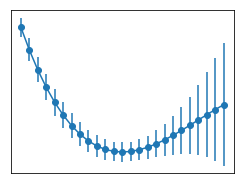

In [22]:
fig, ax = plt.subplots(figsize=(4, 3))
#绘制置信区间的函数
ax.errorbar(x, y2, yerr=y1, fmt='o-')

hide_labels(fig, ax)

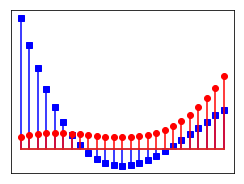

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))
#画茎叶图
ax.stem(x, y2, 'b', markerfmt='bs')
ax.stem(x, y1, 'r', markerfmt='ro')

hide_labels(fig, ax)

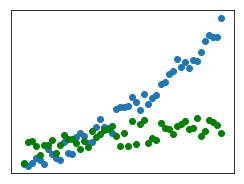

In [24]:
fig, ax = plt.subplots(figsize=(4, 3))

x = np.linspace(0, 5, 50)
#散点图
ax.scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
ax.scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")

hide_labels(fig, ax)

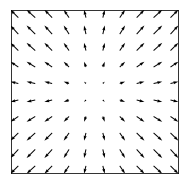

In [25]:
fig, ax = plt.subplots(figsize=(3, 3))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

x = y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = np.sin(X)
V = np.sin(Y)
#二维矢量场图
ax.quiver(X, Y, U, V)

hide_labels(fig, ax)

## Text formatting and annotation

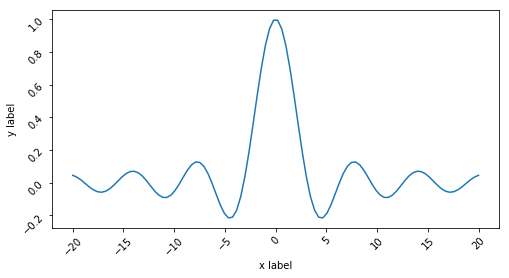

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(-20, 20, 100)
y = np.sin(x) / x

ax.plot(x, y)

ax.set_ylabel("y label")
ax.set_xlabel("x label")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)   #label旋转45°

## Axes

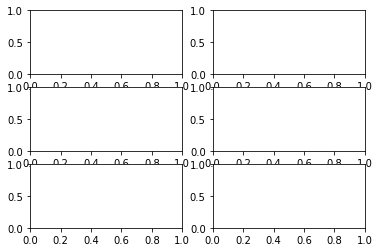

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=3)   #子图：2列3行

## Line properties

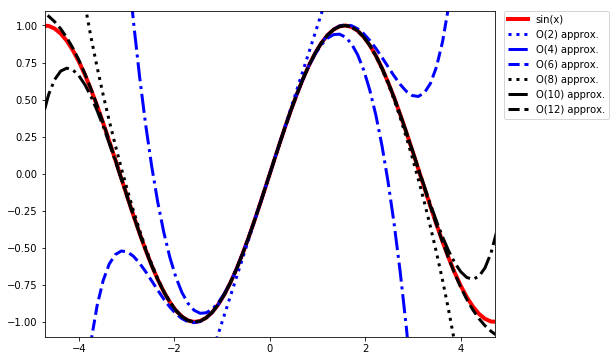

In [28]:
import sympy as s
import numpy as np

# a symbolic variable for x, and a numerical array with specific values of x
#x的符号变量和具有特定值x的数值数组
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

#计算sin（x）在数组x中的数值的n阶Talyor级数展开式。
def sin_expansion(x, n):
    """
    Evaluate the nth order Talyor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
#运用整除和余数的方式为不同的阶数选择颜色和线的形式
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)   
#bbox_to_anchor确定图例在轴的位置，loc=2:右上；borderaxespad：轴与图例边框之间的距离
fig.subplots_adjust(right=.75);
#subplots_adjust(self, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#参数含义：left, right, bottom, top：子图所在区域的边界。
#当值大于1.0的时候子图会超出figure的边界从而显示不全；值不大于1.0的时候，子图会自动分布在一个矩形区域（下图灰色部分）

In [29]:
fig.savefig("sin-expansion.pdf")

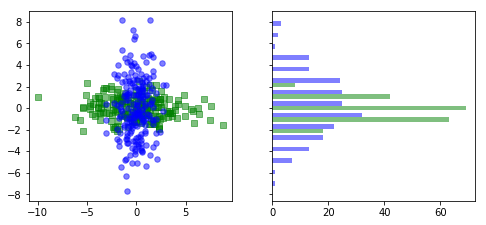

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)  #1行2列 ，sharey共享y轴

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');
#orientation:默认水平方向

## Legends

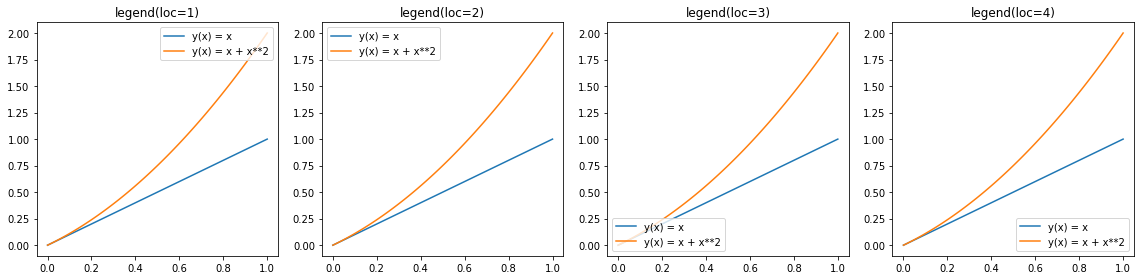

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    #loc=1:右上;loc=2:左上;loc=3:左下;loc=4:右下
    #loc=1 for upper-right corner, loc=2 for upper-left corner, loc=3 for the lower-left corner, and loc=4 for lower-right corner
    axes[n].set_title("legend(loc=%d)" % (n+1))

fig.tight_layout()
fig.savefig("legend-loc.pdf")

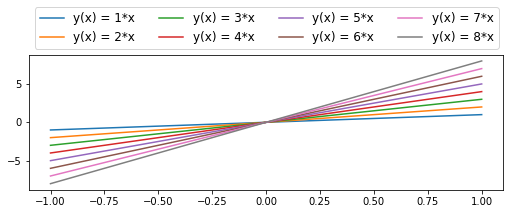

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))

x = np.linspace(-1, 1, 100)

for n in range(1, 9):
    ax.plot(x, n * x, label="y(x) = %d*x" % n)

ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1), fontsize=12) #图例分为4列，位置在上方，
fig.subplots_adjust(top=.75);
fig.savefig("legend-loc-2.pdf")

### Axis labels

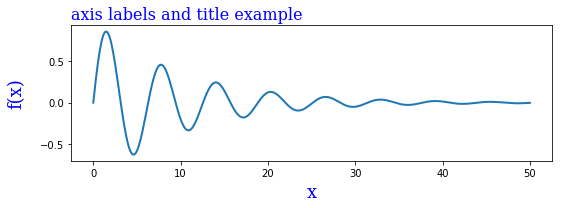

In [35]:
fig, ax = plt.subplots(figsize=(8, 3))#, subplot_kw={'axisbg': "#ebf5ff"})  #字典类型，可选参数。把字典的关键字传递给add_subplot()来创建每个子图

x = np.linspace(0, 50, 500)
ax.plot(x, np.sin(x) * np.exp(-x/10), lw=2)

ax.set_xlabel("x", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("f(x)", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("axis labels and title example", loc='left',
             fontsize=16, fontname='serif', color="blue")

fig.tight_layout()
fig.savefig("ch4-axis-labels.pdf")

### Axis range

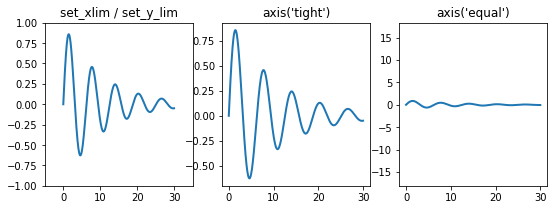

In [36]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))#, subplot_kw={'axisbg': "#ebf5ff"})   #背景色

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)  #x轴 -5到35
axes[0].set_ylim(-1, 1)   #y轴 -1到1
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')   #设置坐标轴的范围为数据的范围
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')   #表示x轴和y轴的单位长度相同
axes[2].set_title("axis('equal')")   

fig.savefig("ch4-axis-ranges.pdf")

### Ticks

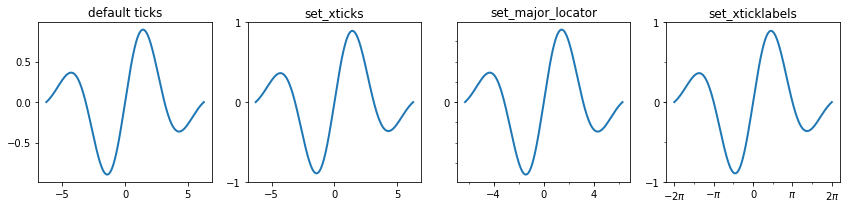

In [37]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500) #函数定义域
y = np.sin(x) * np.exp(-x**2/20)   #绘制的函数

fig, axes = plt.subplots(1, 4, figsize=(12, 3))  #一共画一行四列图，长12，宽3

axes[0].plot(x, y, lw=2)  #在第一个位置画"default ticks"，线条粗细为2
axes[0].set_title("default ticks")  #默认的刻度，没有定义

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1]) #设定纵坐标的刻度
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))  #设置大格的最大刻度有4个
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8)) #设置小格的刻度
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2])) #设置小格的刻度
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()
fig.savefig("ch4-axis-ticks.pdf")

#### Grid

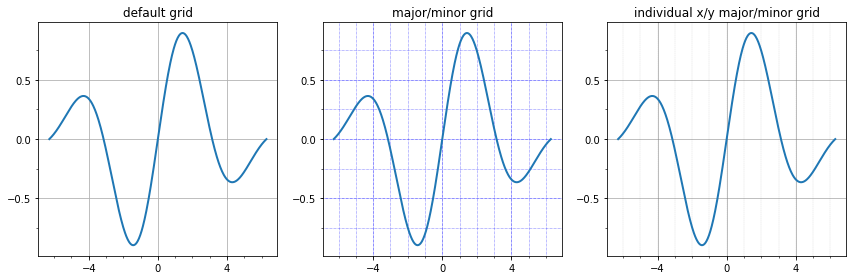

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)  #设置大格刻度的倍数
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)  #循环确定三幅图的坐标系刻度都是一样的

axes[0].set_title("default grid")  #第一幅图为默认，不设置
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)  #设置大小可读都有网格，蓝色，虚线，0.5粗细

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()
fig.savefig("ch4-axis-grid.pdf")

#### Ticker formatting

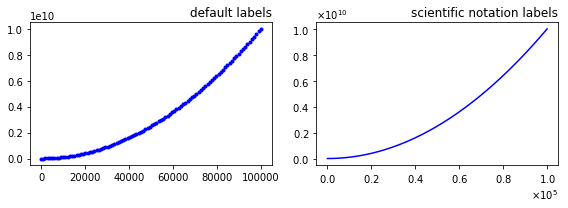

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)  #函数定义域
y = x ** 2

axes[0].plot(x, y, 'b.')  #b.表示线条为蓝色
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) #将标签basenumber设置成两位
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig("ch4-axis-scientific.pdf")

## Log plots

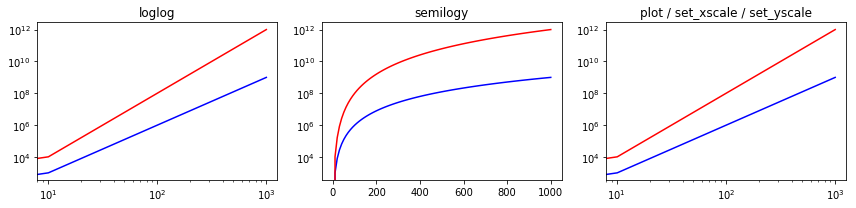

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')  #双对数坐标，x和y都变成log（x）和log（y）
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale') #和第一个达到的效果一样
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

fig.tight_layout()
fig.savefig("ch4-axis-log-plots.pdf")

## Twin axes

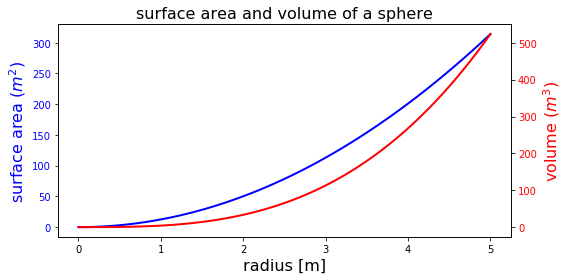

In [41]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  
v = (4 * np.pi / 3) * r ** 3  


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()  #共享x轴
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()
fig.savefig("ch4-axis-twin-ax.pdf")

## Spines

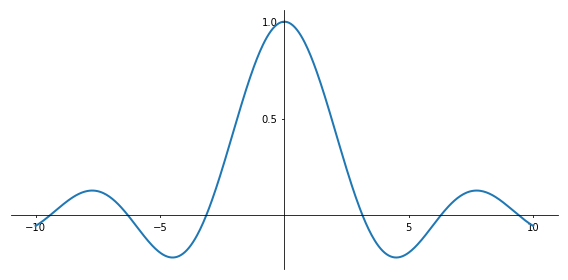

In [42]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# 取消顶部和右侧的间隔
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 取消底部和左侧的坐标刻度
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 将坐标轴设置为原点
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# 数字上的背景都换成白色
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
                    'edgecolor': 'white'})
    
fig.tight_layout()
fig.savefig("ch4-axis-spines.pdf")

## Advanced grid layout

### Inset

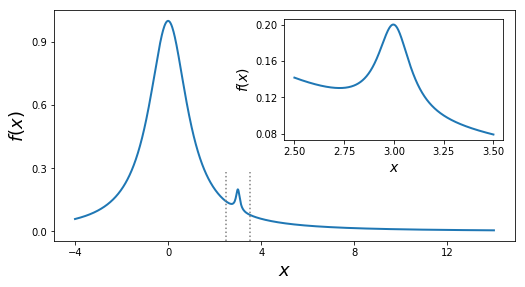

In [43]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):   #定义函数，调用ax，x，f函数和字体大小
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# 主图
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8])#, axisbg="#f5f5f5")  背景颜色设置  右、上开始选位置
x = np.linspace(-4, 14, 1000)  #定义域
plot_and_format_axes(ax, x, f, 18)

# 小图
x0, x1 = 2.5, 3.5  #范围
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")  #在主图上画两条虚线表示取值

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42])#, axisbg='none')   #横向50% 纵向50%，（左、下）长占38%，高占42% 
                                                            #为了保证小图和主图的统一，此时设置小图的背景颜色为none
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

fig.savefig("ch4-advanced-axes-inset.pdf")

## Subplots

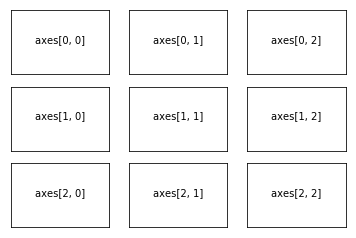

In [44]:
ncols, nrows = 3, 3

fig, axes = plt.subplots(nrows, ncols)

for m in range(nrows):
    for n in range(ncols):
        axes[m, n].set_xticks([])
        axes[m, n].set_yticks([])
        axes[m, n].text(0.5, 0.5, "axes[%d, %d]" % (m, n),
                       horizontalalignment='center')

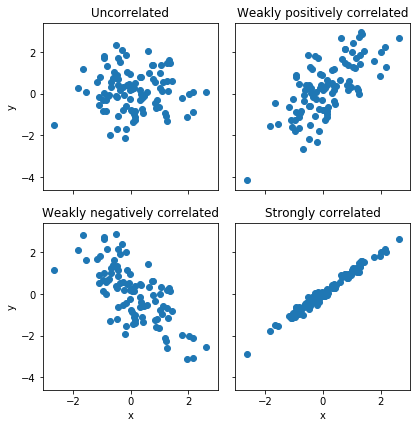

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

fig.savefig("ch4-advanced-axes-subplots.pdf")

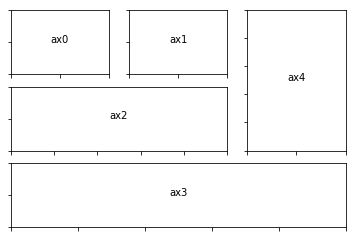

In [46]:
fig = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])  #将刻度标识清空

ax0 = plt.subplot2grid((3, 3), (0, 0))  #横竖各占1/3，在（0,0）的位置
ax1 = plt.subplot2grid((3, 3), (0, 1))  #横竖各占1/3，在（0,1）的位置
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)  #横竖各占1/3，在（1,0）的位置，占两个列宽
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)  #横竖各占1/3，在（2,0）的位置，占三个列宽
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)  #横竖各占1/3，在（0,2）的位置，占2个行宽

axes = [ax0, ax1, ax2, ax3, ax4]  #表示每个格名称的列表
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]  #循环写入每个格名称，水平居中，0.5表示在50%的位置
                                                                                            #0.1在左下角，0.8在右上角
[clear_ticklabels(ax) for ax in axes]  #将刻度标识清空

fig.savefig("ch4-advanced-axes-subplot2grid.pdf")

### gridspec

In [47]:
from matplotlib.gridspec import GridSpec

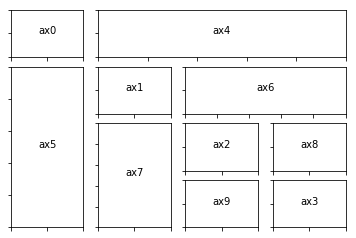

In [48]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)  #四行四列

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])

ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])

ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])

ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])


def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])  #将刻度标识清空

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

fig.savefig("ch4-advanced-axes-gridspec-1.pdf")

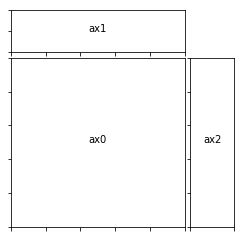

In [49]:
fig = plt.figure(figsize=(4, 4))

gs = mpl.gridspec.GridSpec(2, 2,width_ratios=[4, 1],height_ratios=[1, 4],wspace=0.05, hspace=0.05)  
#长宽个分为两部分，宽4:1分布，高1:4分布，空白的间隔大小

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

fig.savefig("ch4-advanced-axes-gridspec-2.pdf")

## Colormap

In [50]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)  #用于生成网格采样点的函数，根据这些采样点来绘制出整个图形。(用两个坐标轴上的点在平面上画网格。)
#将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

分类：qualitative colormaps：量化（离散化）色图；
miscellaneous colormaps：其他色图；

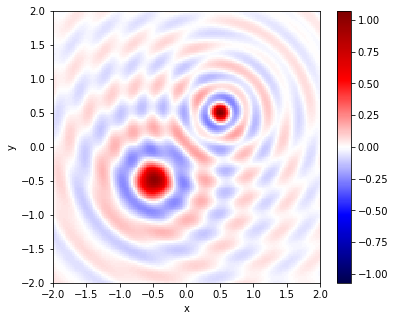

In [51]:
Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())  #设置图形的颜色（主图） 
        # https://blog.csdn.net/lly1122334/article/details/88535217（解释cmap='seismic'颜色）
                                                                                #颜色的范围（vmin=-abs(Z).max(), vmax=abs(Z).max(）
ax.axis('tight')  #设置坐标轴显示范围为紧凑型
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

热图（heatmap）是数据分析的常用方法，通过色差、亮度来展示数据的差异、易于理解。Python在Matplotlib库中，调用imshow()函数实现热图绘制。

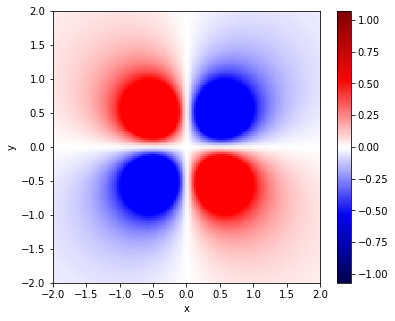

In [52]:
Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,    #The imshow method works similarly but only expects the data array Z as argument
               # https://blog.csdn.net/lly1122334/article/details/88535217（解释cmap=mpl.cm.bwr颜色）
              extent=[x.min(), x.max(), y.min(), y.max()])  #确定坐标轴上的数值范围


ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)  #colorbar显示  If ax is given, the space will be taken from this Axes object for the new colorbar.
#cb = fig.colorbar(p, cax=ax)  #colorbar显示  If, on the other hand, cax is given, then the colorbar will draw on this Axes object.

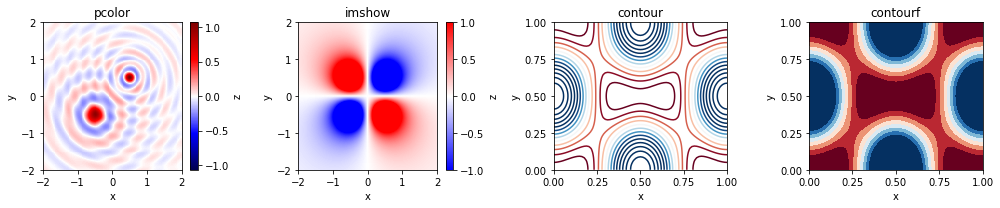

In [53]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

fig, axes = plt.subplots(1, 4, figsize=(14, 3))

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)


p = axes[0].pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
axes[0].axis('tight')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("pcolor")
axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


cb = fig.colorbar(p, ax=axes[0])
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])


Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

im = axes[1].imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

axes[1].axis('tight')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("imshow")
cb = fig.colorbar(im, ax=axes[1])

axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
#cb.ax.set_axes_locator(mpl.ticker.MaxNLocator(4))
cb.set_label("z")   #给colorbar设置
cb.set_ticks([-1, -.5, 0, .5, 1])

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)
Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = axes[2].contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)  #轮廓上色，和下面的contourf做对比

axes[2].axis('tight')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title("contour")  

axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


c = axes[3].contourf(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)   #填充等高线之间

axes[3].axis('tight')
axes[3].set_xlabel('x')
axes[3].set_ylabel('y')
axes[3].set_title("contourf")

axes[3].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[3].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()
fig.savefig('ch4-colormaps.pdf')


Text(0, 0.5, 'y')

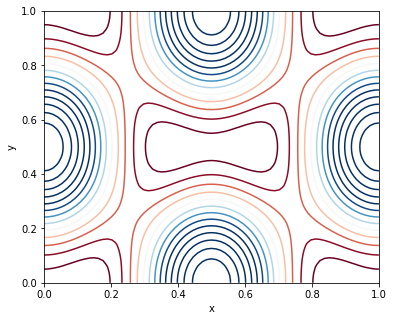

In [54]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)

Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = ax.contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')

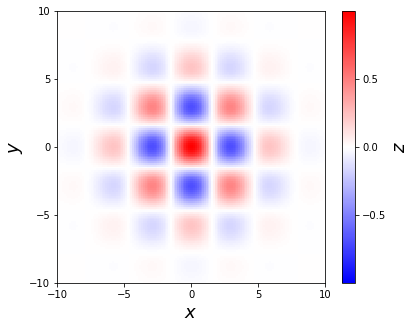

In [55]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, vmin=-abs(Z).max(), vmax=abs(Z).max(), cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

fig.savefig("ch4-colormap-pcolor.pdf")

## 3D plots

In [56]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [57]:
x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

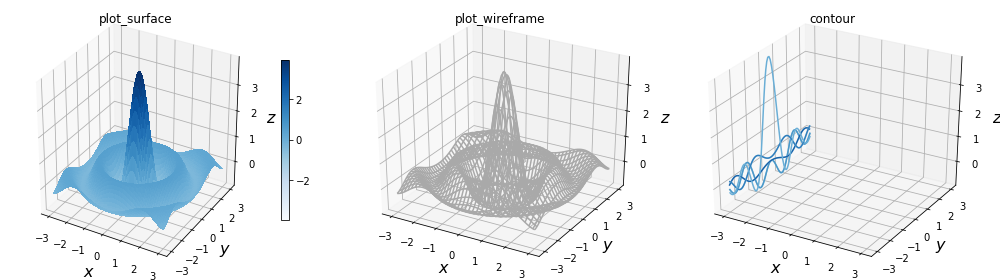

In [58]:
fig, axes = plt.subplots(1, 3,figsize=(14, 4) , subplot_kw={'projection': '3d'})   #figsize=(14宽, 1高)  subplot_kw表示对所有子图都设置为3D
#ax = ax = fig.add_subplot(1, 1, 1, projection='3d')   3D和2D可混合
def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues) 
#rstride=1, cstride=1： row stride 和 column stride 防止数据太密集
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

#cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)#offset = 0 从z轴的0开始  投影？
#cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='x', offset=-3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")

fig.tight_layout()
fig.savefig("ch4-3d-plots.png", dpi=200)

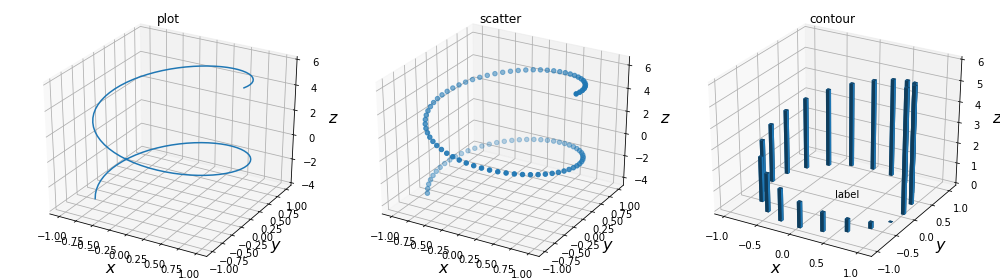

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

r = np.linspace(0, 10, 100)
p = axes[0].plot(np.cos(r), np.sin(r), 6 - r)
#cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot")

p = axes[1].scatter(np.cos(r), np.sin(r), 6 - r)
title_and_labels(axes[1], "scatter")

r = np.linspace(0, 6, 20)
p = axes[2].bar3d(np.cos(r), np.sin(r), 0* np.ones_like(r), 0.05* np.ones_like(r), 0.05 * np.ones_like(r), 6 - r)
title_and_labels(axes[2], "contour")
axes[2].text(0, 0, 0, "label")
fig.tight_layout()
#fig.savefig("ch4-3d-plots.png", dpi=200)